In [1]:
import pandas as pd, numpy as np, re, matplotlib.pyplot as plt, seaborn as sns

## Data Loading

In [2]:
df = pd.read_csv('/content/drive/MyDrive/INNO_DS/Data_Analysis/EDA_Project/oyo (1).xls')
df

,Title,Ratings,NoofRatings,Overall_Rating,Actual_prices,Slashed_prices,Discount,Tax,Savings_price,Total_price,Address,City
0,Super Townhouse Oak N7 Elite,4.3,2111.0,Very Good,1262,4539,68,132,1764,1414,"Champapet, Hyderabad",Hyderabad
1,Super OYO Flagship Vsm Grand,4.6,598.0,Excellent,864,3237,68,132,1258,1008,"Aprana Sarovar , Gopanpally",Hyderabad
2,Townhouse Secunderabad Near Paradise Metro Sta...,4.5,88.0,Excellent,1273,5235,72,132,2199,1466,"Jogani, Hyderabad",Hyderabad
3,Super OYO Flagship Boduppal,4.5,2135.0,Excellent,721,3688,77,132,1257,838,"Near Andhra Bank, Medipally, Hyderabad",Hyderabad
4,OYO Hotel Golden Pride,4.4,1008.0,Very Good,709,3014,72,132,1266,844,"Near Madhura Nagar, Shamshabad, Hyderabad",Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...
715,Super OYO Anandalok Guest House,4.2,117.0,Very Good,1262,4665,68,165,1813,1453,"Champadali, Kolkata",Kolkata
716,Super Townhouse OAK Hotel 1 Lovelock,4.2,1013.0,Very Good,1722,7067,72,165,2968,1979,"Ballygunge, Kolkata",Kolkata
717,Flagship Hotel Palki Palace Near Netaji Subhas...,3.4,128.0,Fair,517,2122,71,165,877,609,"Gopalpur I, Kolkata",Kolkata
718,OYO Flagship 79258 Shree Residency,4.1,372.0,Very Good,709,3014,72,165,1266,844,DD 232 STREET NO 293 ACTION AREA 1 NEW TOWN BI...,Kolkata


In [ ]:
df.shape

(720, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           720 non-null    object 
 1   Ratings         715 non-null    float64
 2   NoofRatings     715 non-null    float64
 3   Overall_Rating  715 non-null    object 
 4   Actual_prices   720 non-null    int64  
 5   Slashed_prices  720 non-null    int64  
 6   Discount        720 non-null    int64  
 7   Tax             720 non-null    int64  
 8   Savings_price   720 non-null    int64  
 9   Total_price     720 non-null    int64  
 10  Address         720 non-null    object 
 11  City            720 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 67.6+ KB


# Null Values

In [ ]:
df.isna().sum()

Title             0
Ratings           5
NoofRatings       5
Overall_Rating    5
Actual_prices     0
Slashed_prices    0
Discount          0
Tax               0
Savings_price     0
Total_price       0
Address           0
City              0
dtype: int64

# Duplicates

In [ ]:
df.duplicated().sum()

0

# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           720 non-null    object 
 1   Ratings         715 non-null    float64
 2   NoofRatings     715 non-null    float64
 3   Overall_Rating  715 non-null    object 
 4   Actual_prices   720 non-null    int64  
 5   Slashed_prices  720 non-null    int64  
 6   Discount        720 non-null    int64  
 7   Tax             720 non-null    int64  
 8   Savings_price   720 non-null    int64  
 9   Total_price     720 non-null    int64  
 10  Address         720 non-null    object 
 11  City            720 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 67.6+ KB


In [ ]:
df['NoofRatings'].fillna(0,inplace = True)

In [ ]:
df['NoofRatings'] = df['NoofRatings'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           720 non-null    object 
 1   Ratings         715 non-null    float64
 2   NoofRatings     720 non-null    int64  
 3   Overall_Rating  715 non-null    object 
 4   Actual_prices   720 non-null    int64  
 5   Slashed_prices  720 non-null    int64  
 6   Discount        720 non-null    int64  
 7   Tax             720 non-null    int64  
 8   Savings_price   720 non-null    int64  
 9   Total_price     720 non-null    int64  
 10  Address         720 non-null    object 
 11  City            720 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 67.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ratings,715.0,4.208531,0.416162,2.1,4.00,4.2,4.50,5.0
NoofRatings,720.0,549.259722,697.153310,0.0,73.75,291.5,807.00,5134.0
Actual_prices,720.0,862.390278,372.627194,365.0,571.00,774.5,1039.00,3005.0
Slashed_prices,720.0,3626.477778,1370.824923,1442.0,2632.50,3285.0,4238.25,10999.0
Discount,720.0,71.826389,3.554327,51.0,69.00,72.0,73.00,88.0
Tax,720.0,147.222222,45.593055,80.0,112.50,137.5,178.50,277.0
Savings_price,720.0,1412.212500,551.346450,606.0,982.75,1288.5,1700.00,4274.0
Total_price,720.0,1006.204167,416.829631,449.0,681.50,907.5,1206.75,3426.0


In [ ]:
df.dtypes

Title              object
Ratings           float64
NoofRatings         int64
Overall_Rating     object
Actual_prices       int64
Slashed_prices      int64
Discount            int64
Tax                 int64
Savings_price       int64
Total_price         int64
Address            object
City               object
dtype: object

# Correlation

In [12]:
columns_for_correlation = ['Total_price', 'Discount', 'Tax', 'Ratings', 'Savings_price']
correl = df[columns_for_correlation].corr()

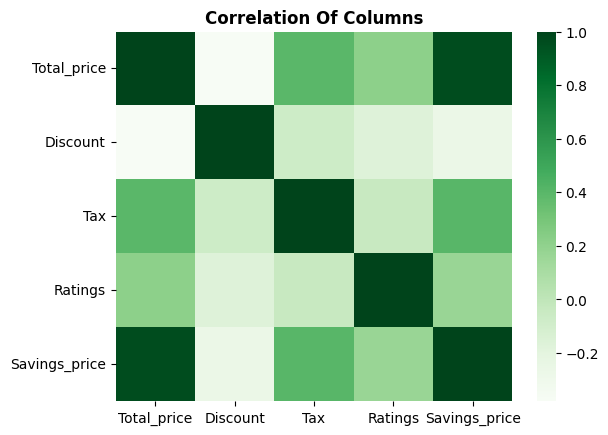

In [13]:
sns.heatmap(correl,cmap='Greens')
plt.title("Correlation Of Columns",weight='bold')
plt.show()

# Exploratory Data Analysis

## Relationships between numerical columns

1. **Total Price vs. Savings Price**: Total price and savings price exhibit a linear relationship, implying higher total prices correlate with increased potential savings, indicating stronger discounts for pricier bookings.

2. **Number of Ratings Distribution**: The distribution of ratings is highly skewed, suggesting a few hotels have numerous ratings while most have fewer, potentially reflecting the dominance of popular hotels in garnering ratings.

3. **Tax Distribution**: Tax distribution is bimodal, indicating two prevalent tax rates, likely due to varying tax regulations or rates based on hotel category or location.



Text(0.5, 1.02, 'Pair Plot of Numeric Columns')

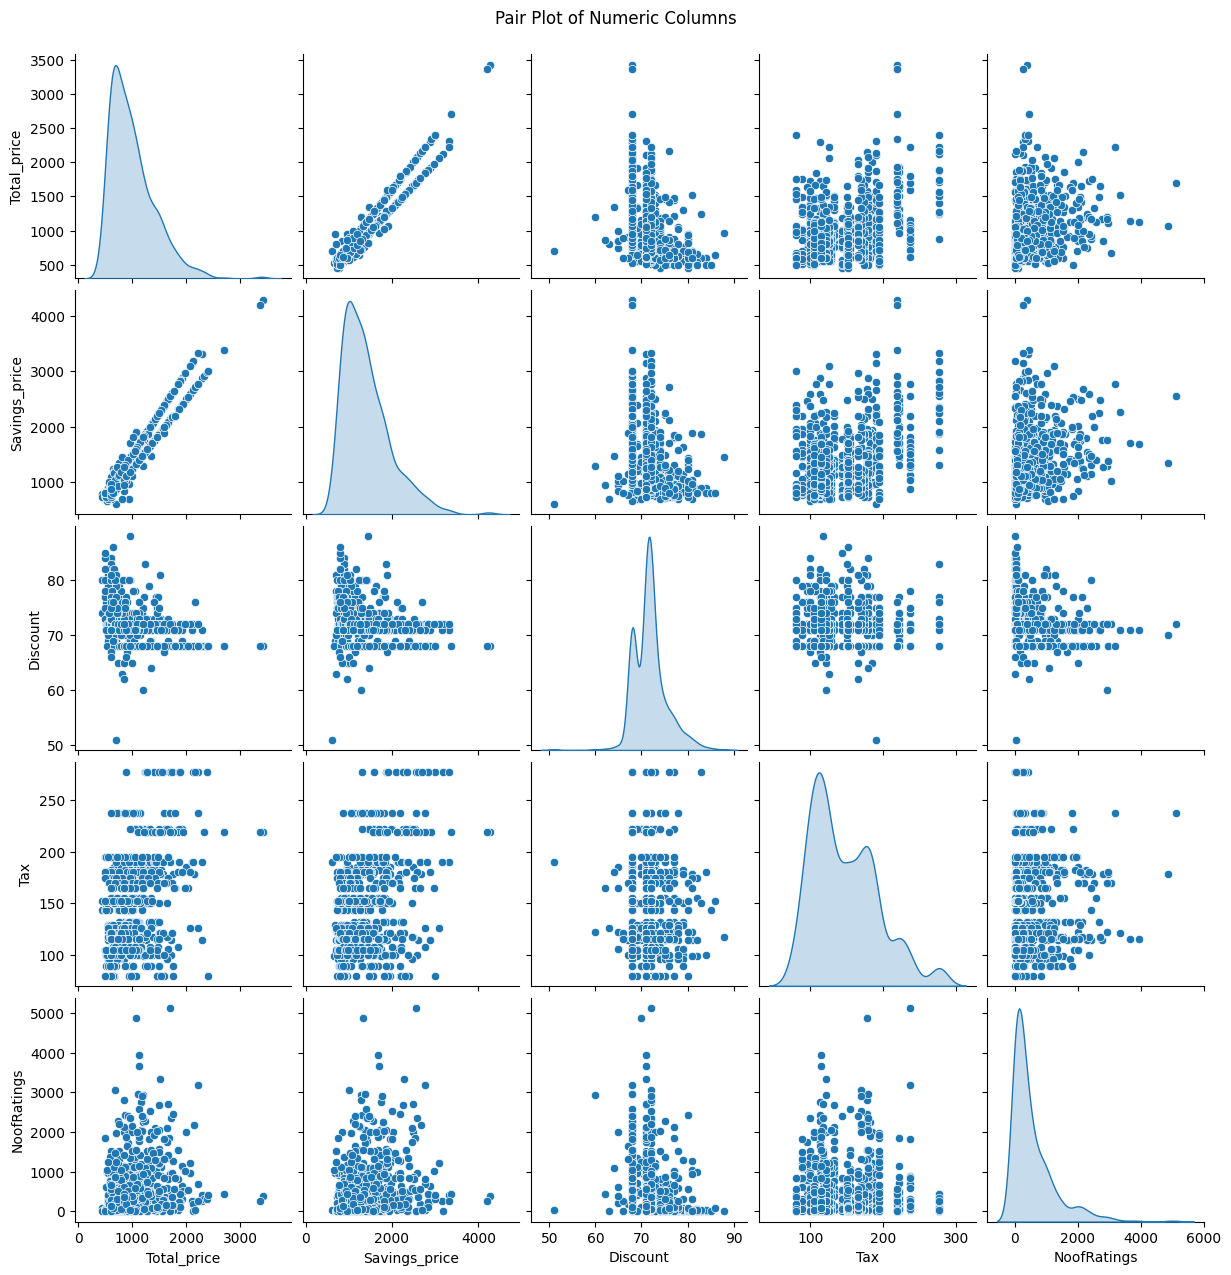

In [ ]:
sns.pairplot(df.dropna(), vars= ['Total_price','Savings_price','Discount','Tax','NoofRatings'], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Columns', y=1.02)

# Distribution of Numerical Data


1. **Total Price Distribution**: Majority of hotels charge prices ranging from ₹500 to ₹1200.
  
2. **Discount Distribution**: Discounts predominantly fall within the range of 70% to 72%.

3. **Number of Ratings Distribution**: Hotels with 500 ratings were the most common.

4. **Savings Price Distribution**: Saving prices typically range between ₹400 to ₹1600.


array([[<Axes: title={'center': 'Total_price'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'NoofRatings'}>,
        <Axes: title={'center': 'Savings_price'}>]], dtype=object)

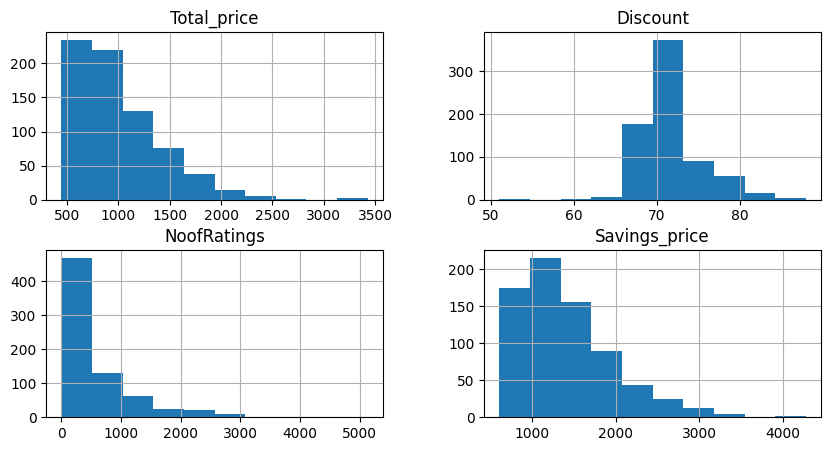

In [ ]:
df[['Total_price', 'Discount', 'NoofRatings','Savings_price']].hist(bins=10, figsize=(10, 5))

# Price based NoofRatings

* In price vs. number of ratings scatter plot, only 20% of data points align with the regression line, indicating a weaker correlation between these variables

* If the  price range of ₹500 to ₹1500, a majority of hotels have received ratings below 1000.
* Some low-priced items have high ratings, while some expensive items have lower ratings

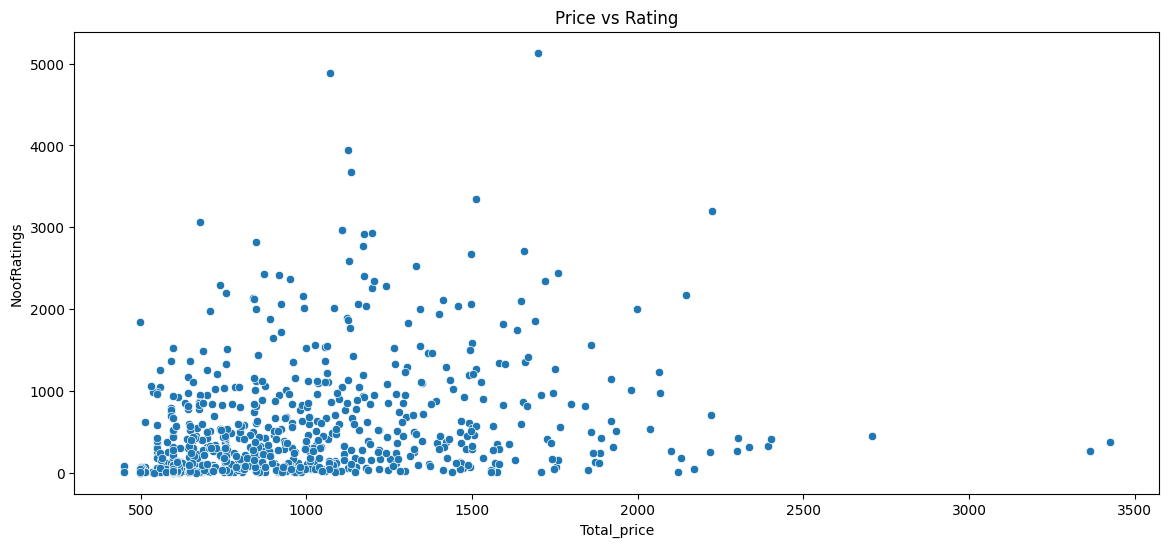

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='Total_price', y='NoofRatings')
plt.title('Price vs Rating')
plt.show()

# Price based Rating

1. **No Clear Linear Trend:** The points on the graph do not exhibit a straightforward linear relationship between price and average rating. This suggests that other factors influence consumer decisions beyond just the cost of an item.
2. **Value Perception:** While higher-priced items don’t always guarantee better ratings, perceived value plays a significant role in consumer choices.

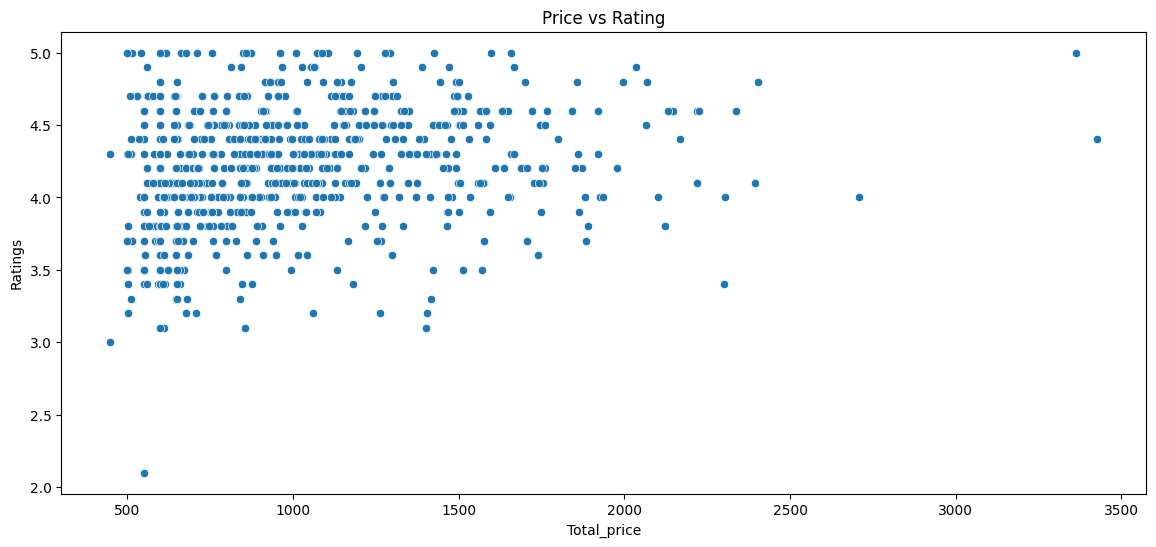

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='Total_price', y='Ratings')
plt.title('Price vs Rating')
plt.show()

# Box plot for  Discount by cities

 * **Concentration of Discounts:**The majority of the discounts offered are concentrated around 65 to 75.

   This range represents where most products fall in terms of discount percentage.

* **Outliers:**
There are outliers present, indicating that some discounts offered were significantly higher than the majority.
These outliers may represent special promotions or unique deals

<ipython-input-29-0cccfbcb2e91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Discount', y = 'City',palette="Set2")


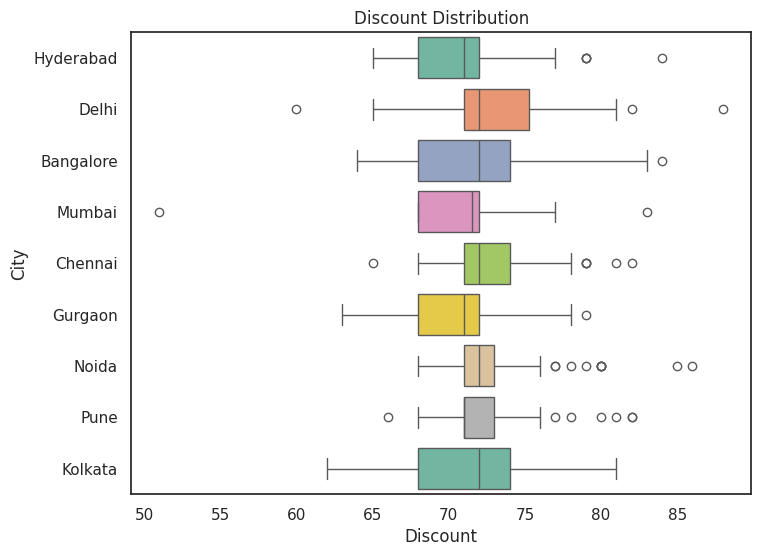

In [29]:
sns.set(style="white")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Discount', y = 'City',palette="Set2")
plt.title('Discount Distribution')
plt.show()

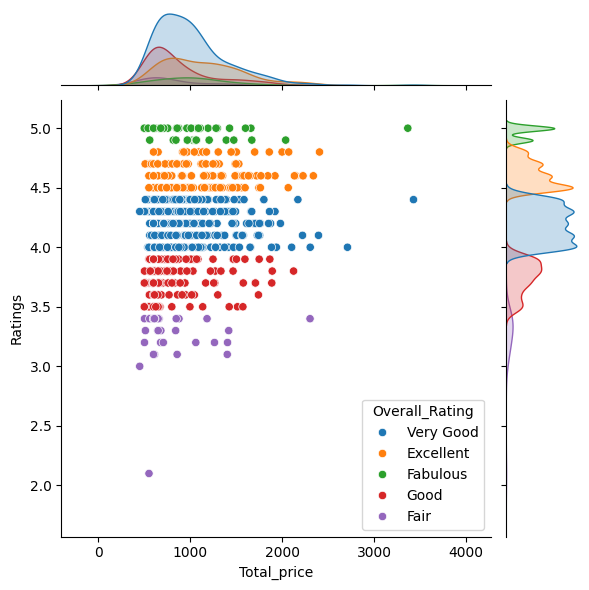

In [ ]:
sns.jointplot(data=df, y="Ratings", x="Total_price", hue="Overall_Rating")

# Total Price Distribution by City and Overall Rating

**Mumbai Pricing and Rating:**

* Mumbai has the highest price among all listed cities.
* However, it does have the highest overall rating.
* This suggests that while Mumbai hotels are expensive, their quality  match the price.

**Hyderabad and Delhi Comparison:**

* Hyderabad and Delhi have similar pricing structures.
* Both cities offer options that are rated as “Very Good”.
Consider these cities for a balance between price and quality.
* In delhi the rating was fair but hotels cost was high.

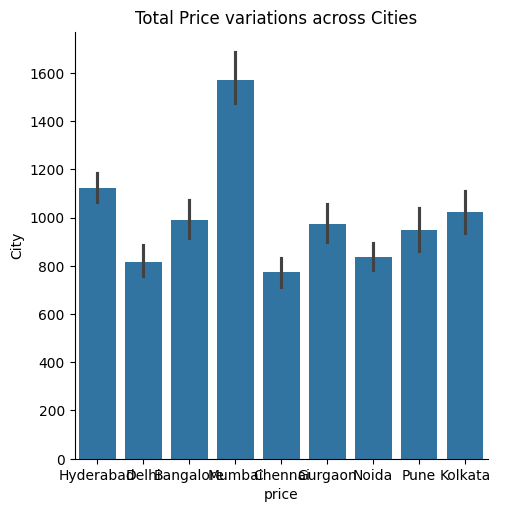

In [15]:
sns.catplot(data=df, kind="bar", x="City", y="Total_price")
plt.title('Total Price variations across Cities  ')
plt.xlabel('price')
plt.ylabel('City')
plt.show()

# Distribution of Ratings Across cities
1. **Hyderabad**: Ratings in Hyderabad predominantly fall under "very good" and "excellent" categories.

2. **Mumbai**: The violin plot for Mumbai shows variability in ratings, with a notable concentration in the "varying" and "fair" categories, which have received higher ratings.

3. **Bengaluru and Chennai**: Ratings for both Bengaluru and Chennai tend to be consistently high, mostly falling under the "very good" category.


<ipython-input-34-6c09c59b3ed7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data= df, x='City', y='Ratings', palette="Set2")


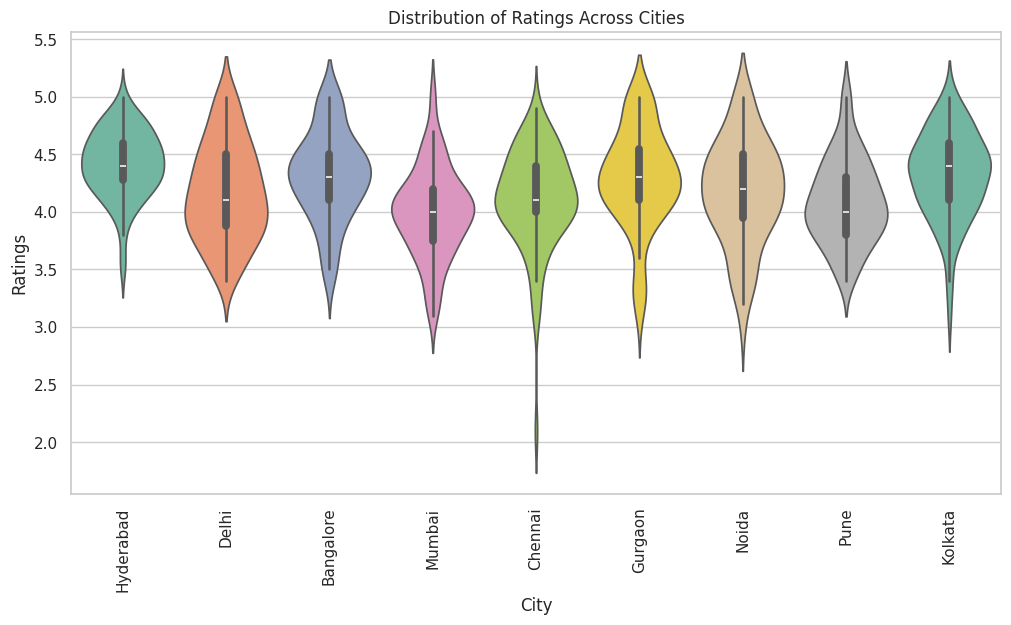

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.violinplot(data= df, x='City', y='Ratings', palette="Set2")
plt.title('Distribution of Ratings Across Cities')
plt.xlabel('City')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

# Number of Hotels by Rating Category
* **"very good"** ratings are more prevalent among hotels across the cities, indicating a higher overall satisfaction level.

*  Conversely, the **"fair"** rating category comprises fewer hotels, suggesting relatively lower satisfaction levels among this subset of establishments

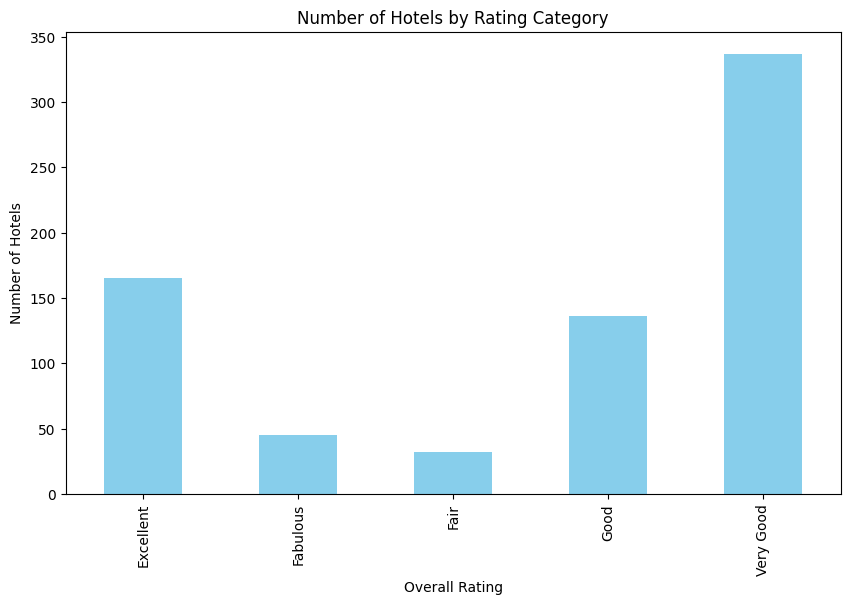

In [ ]:
rating_counts = df['Overall_Rating'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Hotels by Rating Category')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Hotels')
plt.show()

In [ ]:
df['Overall_Rating'].unique()

array(['Very Good', 'Excellent', 'Fabulous', 'Good', 'Fair', nan],
      dtype=object)

#

**Price Distribution:**
* Hyderabad, Delhi, and Bangalore exhibit higher prices ranging between ₹500 to ₹1500.

* Kolkata has the lowest prices among the cities.

* Mumbai and Chennai display a wider range of prices compared to other cities.

<Axes: xlabel='Total_price', ylabel='Density'>

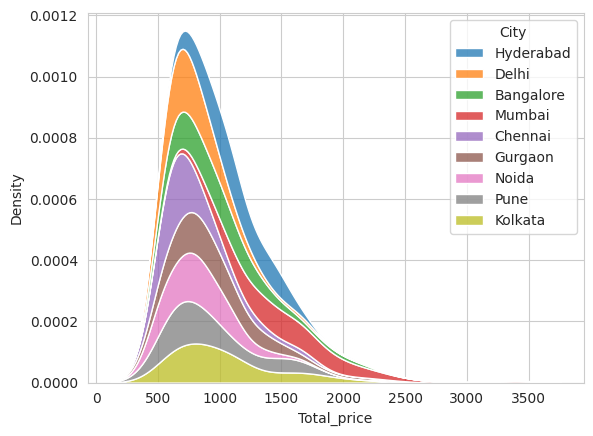

In [ ]:
sns.kdeplot(data=df, x="Total_price", hue="City", multiple="stack")

## Discount Variations across Cities
**Median Discount:**
* The median discount across all cities is around 70%.
* Most cities have a density of discounts centered around this value.
**Variability in Discounts:**
* There is a variation in the distribution of discounts among different cities.
Cities like Hyderabad and Kolkata have a narrower range, indicating less variability in the discounts offered.

<ipython-input-50-5bd2eafded6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="City", x="Savings_price", palette = 'Set2')


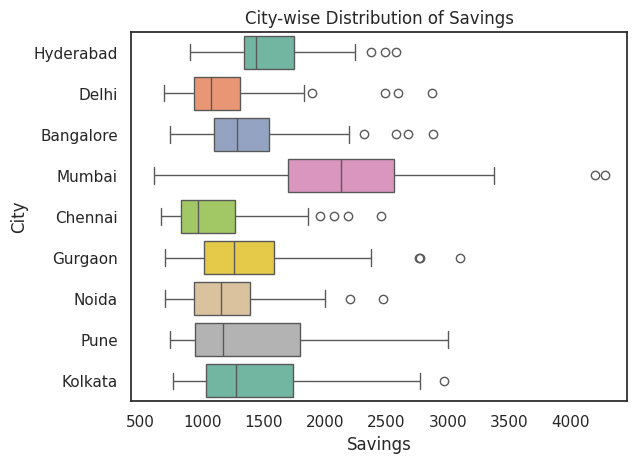

In [50]:
sns.set_style("white")
sns.boxplot(data=df, y="City", x="Savings_price", palette = 'Set2')
plt.title('City-wise Distribution of Savings')
plt.ylabel('City')
plt.xlabel('Savings')
plt.show()



# Average price by Cities

**Price Variation Across Cities:**
* Mumbai has the highest total price, indicating it is likely the most expensive city.
* Chennai has the lowest total price, suggesting it is more budget-friendly.
**City-Specific Pricing:**
* There is a significant variation in total prices between different cities, which could be due to differences in cost of living, demand, or availability of resources.
* Strategies or policies in place in Mumbai might contribute to its notably higher prices.

<ipython-input-20-a0108b5e9a8c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_price_by_Cities.index, x=avg_price_by_Cities.values, palette=custom_colors)


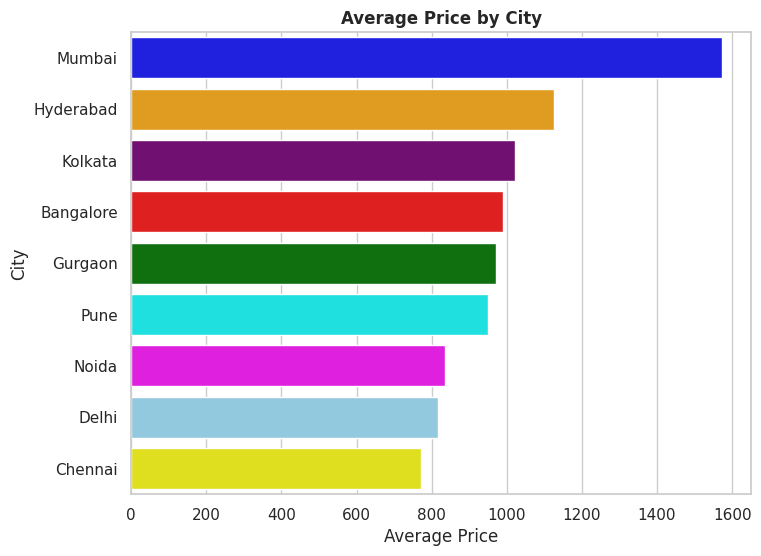

In [20]:
plt.figure(figsize=(8, 6))
avg_price_by_Cities = df.groupby('City')['Total_price'].mean().sort_values(ascending=False)
custom_colors = ['blue', 'orange', 'purple', 'red', 'green', 'cyan', 'magenta','skyblue', 'yellow']
sns.barplot(y=avg_price_by_Cities.index, x=avg_price_by_Cities.values, palette=custom_colors)
plt.title('Average Price by City',weight='bold')
plt.ylabel('City')
plt.xlabel('Average Price')
plt.show()

# Price analysis for Different Cities
1. **Delhi**: Hotels in Delhi typically offer prices ranging from ₹500 to ₹750, indicating a moderate pricing range catering to various budget preferences.

2. **Bangalore**: The hotel prices in Bangalore span a wider range, from ₹500 to ₹1000, suggesting a diverse selection of accommodations catering to different budget levels.

3. **Mumbai**: Hotels in Mumbai tend to be relatively more expensive, with prices ranging from ₹1200 to ₹1500, indicating higher average costs for accommodations in this city.

4. **Chennai**: Chennai offers hotels with prices typically ranging from ₹600 to ₹700, suggesting a relatively narrow pricing range compared to other cities.

5. **Gurgaon**: Gurgaon presents a specific price point of ₹750, indicating a consistent pricing trend among hotels in this area.

6. **Noida**: Hotels in Noida offer a varied pricing range, from ₹400 to ₹800, catering to different budget preferences and providing options for both economical and mid-range accommodations.

7. **Pune**: Pune's hotel prices typically range around ₹500, suggesting a more budget-friendly accommodation scene in this city.

8. **Kolkata**: Kolkata's hotel prices fall within the range of ₹500 to ₹800, providing a moderate pricing range with options for both budget and mid-range accommodations.

9. **Hyderabad**: the majority of hotel prices fall within the range of ₹750 to ₹1000.

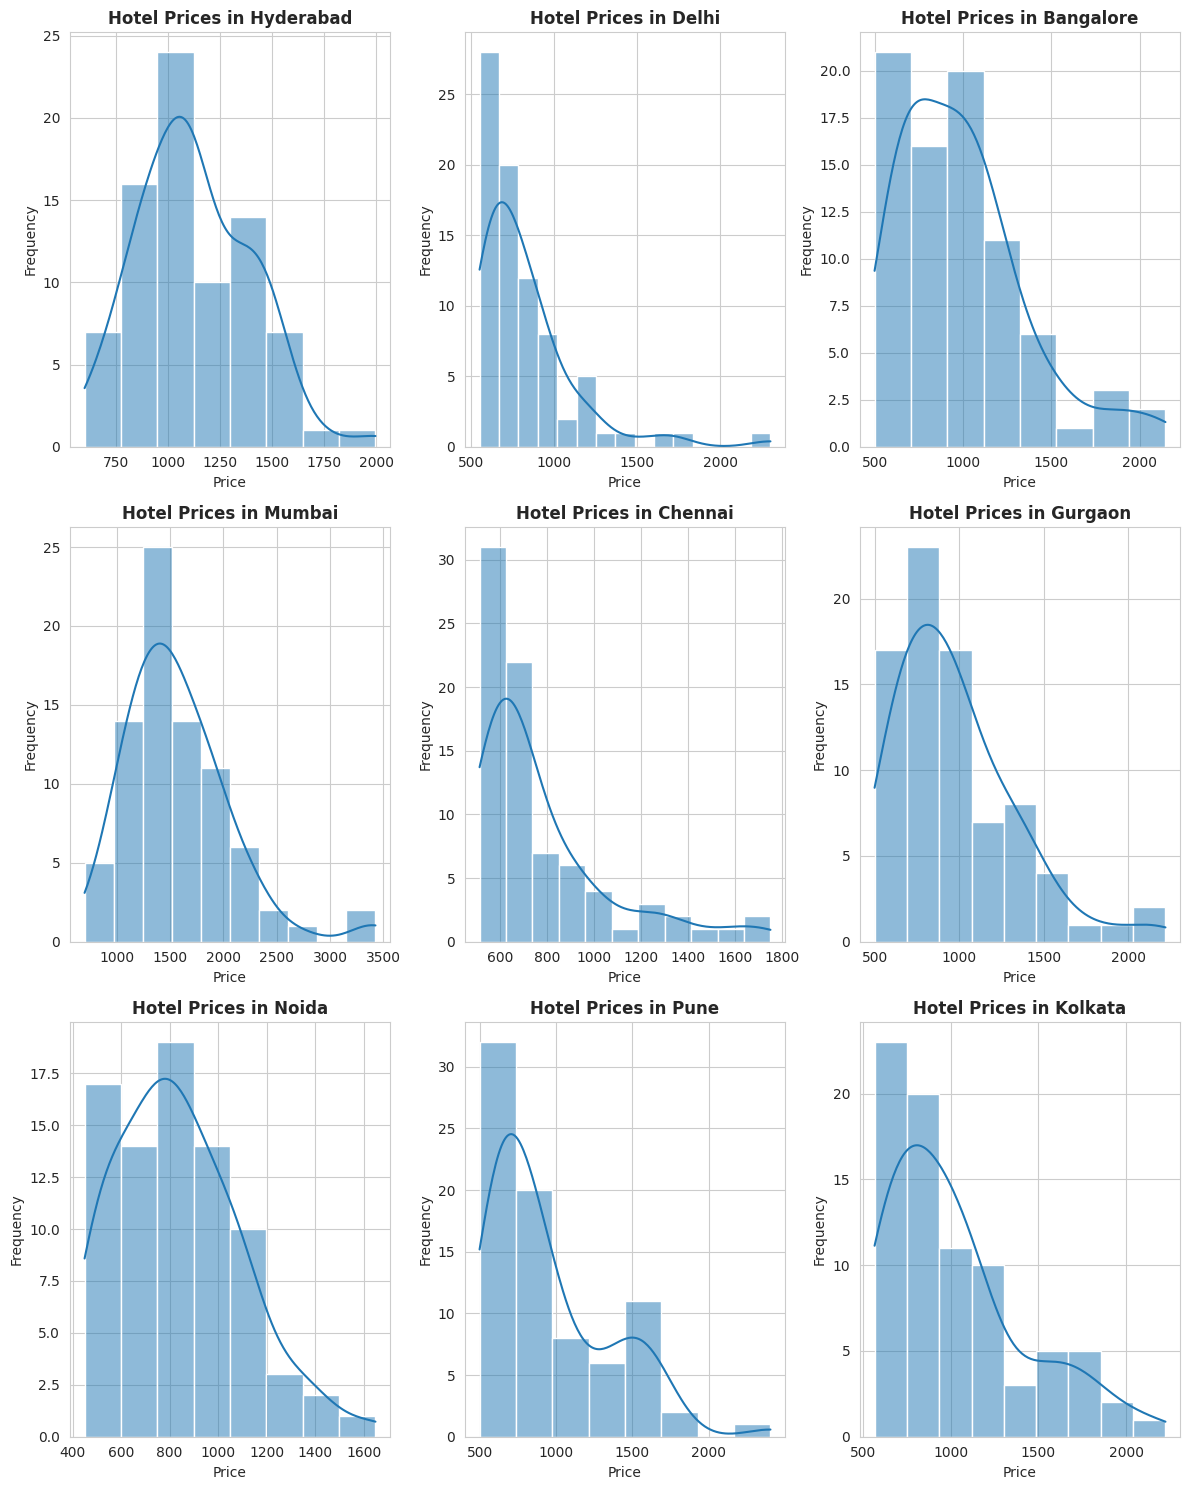

In [ ]:
unique_cities = df['City'].unique()
num_rows = -(-len(unique_cities) // 3)
num_cols = min(3, len(unique_cities))
plt.figure(figsize=(12, 5*num_rows))

for i, city in enumerate(unique_cities, start=1):
    city_data = df[df['City'] == city]
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(city_data['Total_price'], kde=True)
    plt.title(f'Hotel Prices in {city}', weight='bold')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Minimum price hotels with Highest rating

In [5]:
Highest_Ratings = df[(df['Overall_Rating'] == 'Fabulous')]

In [8]:
min_price_hotels = Highest_Ratings.groupby('City').apply(lambda x: x.loc[x['Total_price'].idxmin()])
min_price_hotels[['Title','Total_price']]

,Title,Total_price
City,,
Bangalore,OYO Royal Homes,599
Chennai,Flagship Inn34 Porur,967
Delhi,OYO Flagship Hotel Blue Orchid,754
Gurgaon,OYO Hotel Lime Wood,710
Hyderabad,Super OYO FLAGSHIP HOTEL RAMOJI BESIDE OMNI HO...,1067
Kolkata,SPOT ON Silver Green Near Netaji Subhash Chand...,678
Mumbai,OYO Flagship Hotel Elite Plaza,1426
Noida,OYO Vm Bloom,499
Pune,OYO Royal Stone,599


**Tax Rates**:
   - Mumbai has the highest tax rates among the cities.
   - Kolkata and Gurgaon follow Mumbai with relatively high tax rates.
   - Chennai has the lowest tax rates among the cities.
   - Delhi and Noida have slightly higher tax rates compared to Chennai but lower than Mumbai, Kolkata, and Gurgaon.

Text(0.5, 1.0, 'Highest taxes by Cities')

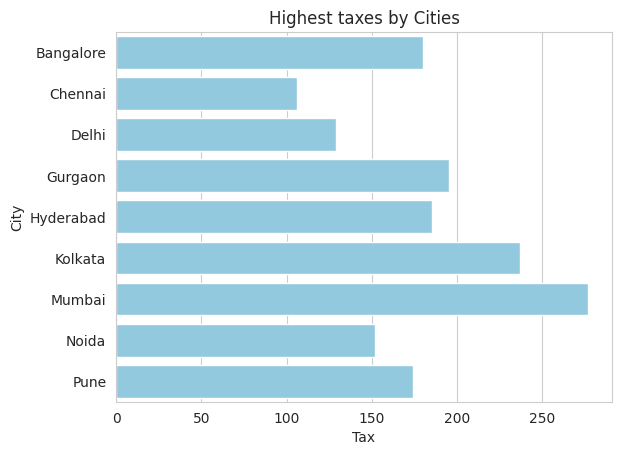

In [ ]:
avg_tax = (df.groupby('City')['Tax'].max()).reset_index()
sns.barplot(data = avg_tax, y = 'City', x = 'Tax', color = 'skyblue')
plt.title('Highest taxes by Cities')

## Max price hotels with low Rating

In [23]:
lowest_Ratings = df[df['Overall_Rating'] == 'Fair']

In [24]:
max_price_hotels = lowest_Ratings.groupby('City').apply(lambda x: x.loc[x['Total_price'].idxmax()])
max_price_hotels[['Title','Total_price']]  # worst_hotels

,Title,Total_price
City,,
Bangalore,SPOT ON Exotic stay,591
Chennai,OYO Flagship India Gate Par View Near Thiruval...,706
Delhi,Townhouse Greater Kailash Near Kailash Colony ...,2301
Gurgaon,OYO Rao residency,856
Kolkata,Flagship Hotel Palki Palace Near Netaji Subhas...,609
Mumbai,OYO Hotel Sarovar Grand,1417
Noida,OYO Hotel Expo View Stay,846
Pune,OYO Yashraj Lodge,613


 **Cities with Hotels Rating Greater Than 4.2**:
   1.  Hyderabad, Bangalore, and Kolkata have a higher proportion of hotels with ratings greater than 4.2.

   2. Mumbai and Pune have a lower proportion of hotels with ratings.


<Axes: xlabel='Title', ylabel='City'>

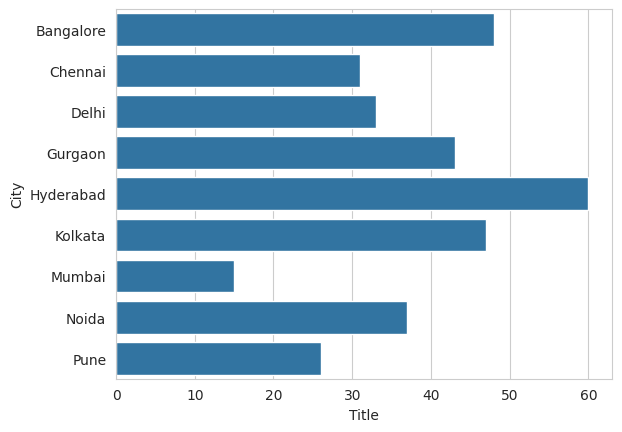

In [ ]:
abovefour = (df[df['Ratings'] > 4.2].groupby('City')['Title'].count()).reset_index()
sns.barplot(data = abovefour, y= 'City', x = 'Title') #ratings greater than 4.2

**Cities with Hotels Rating Less Than 4.2:**
* Mumbai, Delhi, and Pune have a higher proportion of hotels with ratings lesser than 4.2.
* Hyderabad, Kolkata, and Bangalore also have a lower proportion of hotels.

<Axes: xlabel='Title', ylabel='City'>

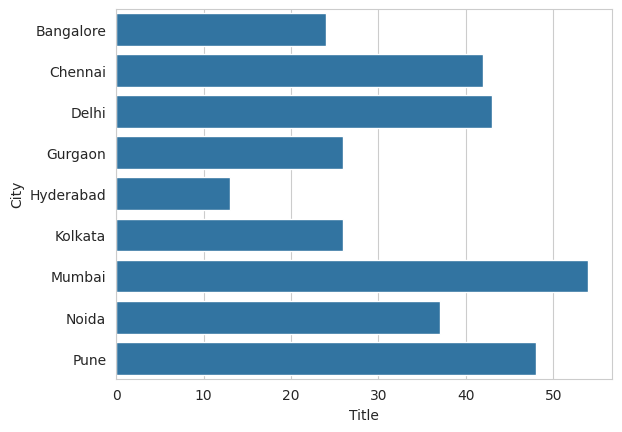

In [ ]:
belowthree = (df[df['Ratings'] < 4.2].groupby('City')['Title'].count()).reset_index()
sns.barplot(data = belowthree, y= 'City', x = 'Title')